# determine_region

#### A notebook to determine what region (e.g. neighborhood, ward, census district) the issue is referring to

In [63]:
import fiona
from shapely.geometry import shape
import nhrc2
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from collections import defaultdict
import numpy as np
from matplotlib.patches import Polygon

%matplotlib inline

In [11]:
nhrc2dir = ('/').join(nhrc2.__file__.split('/')[:-1])+'/'

In [ ]:
c = fiona.open(nhrc2dir+'data/nh_neighborhoods/nh_neighborhoods.shp')
pol = c.next()
geom = shape(pol['geometry'])

In [50]:
c.crs

{'init': u'epsg:4326'}

In [33]:
for i in c.items():
    print(i[1])

{'geometry': {'type': 'Polygon', 'coordinates': [[(-72.91843899999999, 41.313173), (-72.921372, 41.314352), (-72.920858, 41.315444), (-72.919754, 41.317823), (-72.919323, 41.31873999999999), (-72.918906, 41.319638), (-72.918478, 41.320482), (-72.918431, 41.320571), (-72.917988, 41.321487), (-72.917782, 41.321893), (-72.91723299999998, 41.323046), (-72.916879, 41.323826), (-72.916488, 41.32467799999999), (-72.916348, 41.324973), (-72.915789, 41.326158), (-72.914894, 41.328111), (-72.91424399999998, 41.329431), (-72.914136, 41.329671), (-72.913966, 41.330012), (-72.913704, 41.330631), (-72.913621, 41.330819), (-72.91328999999999, 41.331576), (-72.913257, 41.331644), (-72.913086, 41.331999), (-72.912925, 41.332327), (-72.912529, 41.333192), (-72.911301, 41.332493), (-72.909651, 41.331517), (-72.909242, 41.33128), (-72.908947, 41.331103), (-72.908451, 41.330805), (-72.902536, 41.327202), (-72.89882199999998, 41.327902), (-72.897752, 41.32809799999999), (-72.8965, 41.328295), (-72.894741, 4

In [41]:
len(c)

20

In [42]:
for i in c:
    pol = i
    geom = shape(pol['geometry'])
    geom

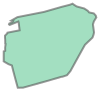

In [43]:
geom

In [61]:
def plot_polygon(ax, poly, color='red'):
    a = np.asarray(poly.exterior)
    ax.add_patch(Polygon(a, facecolor=color, alpha=0.3))
    ax.plot(a[:, 0], a[:, 1], color='black')

def plot_multipolygon(ax, geom, color='red'):
    """ Can safely call with either Polygon or Multipolygon geometry
    """
    if geom.type == 'Polygon':
        plot_polygon(ax, geom, color)
    elif geom.type == 'MultiPolygon':
        for poly in geom.geoms:
            plot_polygon(ax, poly, color)

In [55]:
nhv_geom = defaultdict()
#colors = ['red', 'green', 'orange', 'brown', 'purple']

Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon


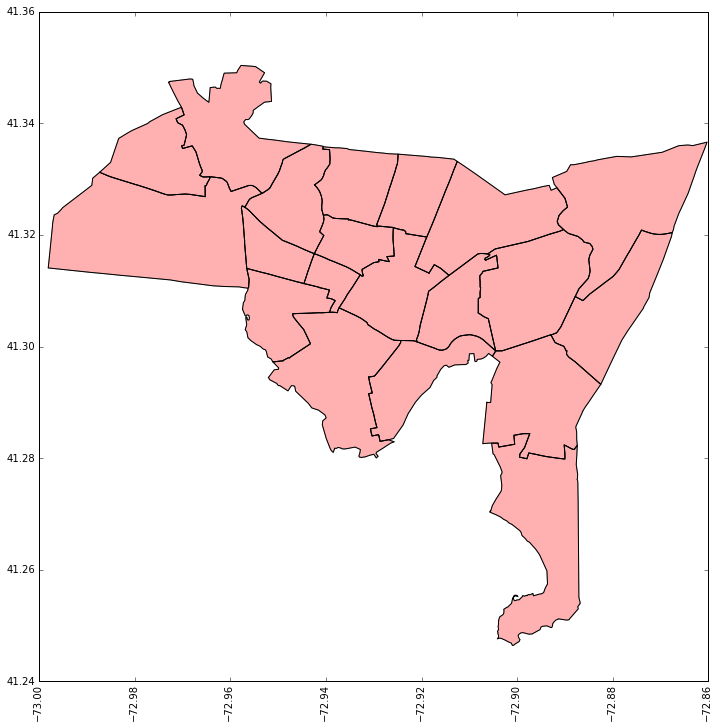

In [64]:
fig, ax = plt.subplots(figsize=(12,12))
for rec in c:
    print(rec['geometry']['type'])
    hood = rec['properties']['name']
    nhv_geom[hood] = shape(rec['geometry'])
    plot_multipolygon(ax, nhv_geom[hood])

labels = ax.get_xticklabels() 
for label in labels: 
    label.set_rotation(90) 